In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import bokeh
import holoviews as hv
from holoviews import opts, dim
from holoviews.element.tiles import EsriImagery
from holoviews.operation.datashader import datashade
import datashader as ds
import pandas as pd
from pandas.api.types import is_datetime64_any_dtype as is_datetime
import geopandas as gpd
import panel as pn
import hvplot.pandas  # noqa
import hvplot.xarray  # noqa
import cartopy.crs as ccrs
import geoviews as gv
import colorcet as cc

import sqlalchemy as db
import geoalchemy2
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

from sqlalchemy.orm import sessionmaker
import ipywidgets as wgts
import ipyleaflet
from datetime import datetime, date, timedelta
from dateutil.relativedelta import *
from dateutil.parser import parse
from pyproj import Proj, CRS
import warnings
from IPython.display import display, HTML
from IPython.display import Image
import seaborn as sns
sns.set(rc={'figure.figsize':(20,12)})

pd.options.plotting.backend = 'holoviews'

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
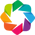

In [59]:
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline
%config Completer.use_jedi = False
warnings.filterwarnings('ignore')
hv.extension('bokeh')

In [60]:
engine = db.create_engine('postgresql+psycopg2://postgres@localhost:5432/ml_faw')
conn = engine.connect()

# Added Meteo/Vegetation Data

In [61]:
temperatures = pd.read_sql("select * from temperatures", conn)

In [62]:
precipitation = pd.read_sql("select * from precipitation", conn)

In [63]:
soil_moisture = pd.read_sql("select * from sm", conn)

In [64]:
fcover = pd.read_sql("select * from fcover", conn)

In [65]:
temp_prec = pd.merge(left=temperatures, right=precipitation, left_on='id', right_on='id')

In [66]:
temp_prec

id      tmin     tmax  mean_temperature    precip
0    57564  19.19460  29.2414           24.2180  9.791740
1    72077  20.31820  32.0538           26.1860  5.957760
2    57665  18.17030  31.5879           24.8791  0.000000
3    57643  20.81690  30.6682           25.7425  0.564718
4    57668  18.17030  31.5879           24.8791  0.000000
..     ...       ...      ...               ...       ...
662  71507   7.81310  22.9496           15.3813  0.000000
663  71460   9.48964  24.1331           16.8114  0.000345
664  71484   7.81310  22.9496           15.3813  0.000000
665  71798   7.81310  22.9496           15.3813  0.000000
666  72065   7.81310  22.9496           15.3813  0.000000

[667 rows x 5 columns]

In [67]:
temp_prec_soil = pd.merge(left=temp_prec, right=soil_moisture, left_on='id', right_on='id')

In [68]:
temp_prec_fcover_soil = pd.merge(left=temp_prec_soil, right=fcover, left_on='id', right_on='id')

In [69]:
temp_prec_fcover_soil

id     tmin     tmax  mean_temperature  precip  index     country  \
0     65271  21.9144  31.3002           26.6073     0.0      0  Mozambique   
1     65271  21.9144  31.3002           26.6073     0.0      1  Mozambique   
2     65271  21.9144  31.3002           26.6073     0.0      2  Mozambique   
3     65271  21.9144  31.3002           26.6073     0.0      3  Mozambique   
4     65271  21.9144  31.3002           26.6073     0.0      4  Mozambique   
...     ...      ...      ...               ...     ...    ...         ...   
4805  72065   7.8131  22.9496           15.3813     0.0    299      Zambia   
4806  72065   7.8131  22.9496           15.3813     0.0    349      Zambia   
4807  72065   7.8131  22.9496           15.3813     0.0    399      Zambia   
4808  72065   7.8131  22.9496           15.3813     0.0    449      Zambia   
4809  72065   7.8131  22.9496           15.3813     0.0    499      Zambia   

            date             district       first        lat        lon  \
0     2022-03-31              Nampula  213.947128 -14.535337  40.634844   
1      2022-04-1              Nampula  210.440125 -14.535337  40.634844   
2      2022-04-2              Nampula  206.988129 -14.535337  40.634844   
3      2022-04-3              Nampula  203.207626 -14.535337  40.634844   
4      2022-04-4              Nampula  199.184372 -14.535337  40.634844   
...          ...                  ...         ...        ...        ...   
4805  2022-06-25  Copperbelt Province  185.309631 -12.811859  28.210287   
4806  2022-06-26  Copperbelt Province  185.011993 -12.811859  28.210287   
4807  2022-06-27  Copperbelt Province  184.733749 -12.811859  28.210287   
4808  2022-06-28  Copperbelt Province  184.614502 -12.811859  28.210287   
4809  2022-06-29  Copperbelt Province  184.549118 -12.811859  28.210287   

      perc_numeric  presence                 village  fcover_val  
0             0.18         0                  Mucaia       1.020  
1             0.18         0                  Mucaia       1.020  
2             0.18         0                  Mucaia       1.020  
3             0.18         0                  Mucaia       1.020  
4             0.18         0                  Mucaia       1.020  
...            ...       ...                     ...         ...  
4805          0.46         1  Kitwe, Nkana,Parklands       0.234  
4806          0.46         1  Kitwe, Nkana,Parklands       0.234  
4807          0.46         1  Kitwe, Nkana,Parklands       0.234  
4808          0.46         1  Kitwe, Nkana,Parklands       0.234  
4809          0.46         1  Kitwe, Nkana,Parklands       0.234  

[4810 rows x 16 columns]

In [83]:
temp_prec_fcover_soil.rename(columns={"mean_temperature": "tmean", "first": "sm",'fcover_val':'vegetation'},inplace=True)

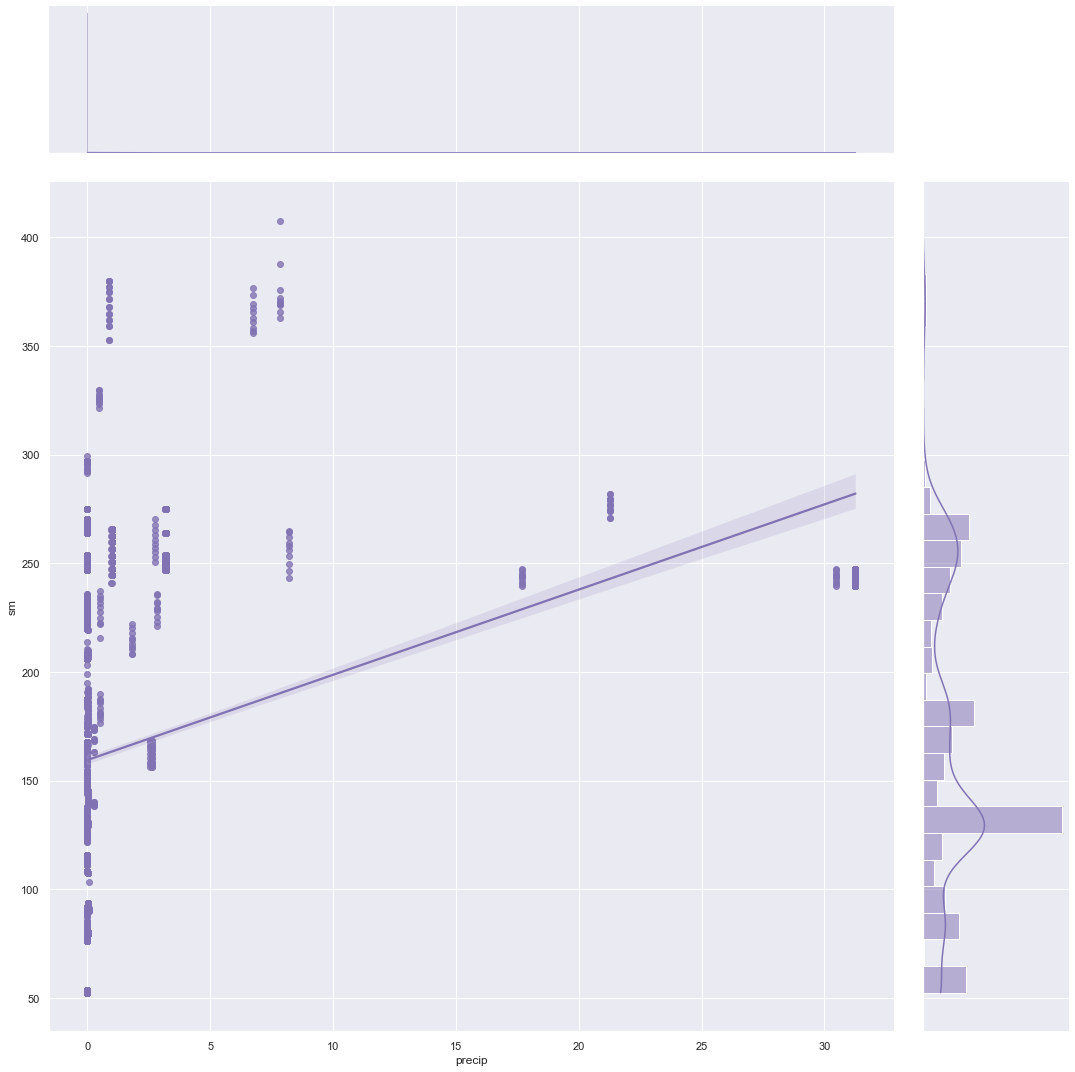

In [85]:
sns.jointplot(data=temp_prec_fcover_soil, x="precip", y="sm", kind="reg", truncate=True, color="m", height=15);

Text(0, 0.5, 'Vegetation % 10 days')

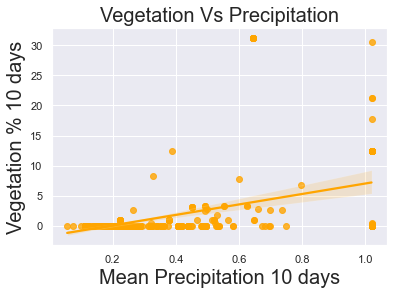

In [86]:
fp = sns.regplot(data=temp_prec_fcover, x="fcover_val", y="precip", color="orange");
fp.axes.set_title("Vegetation Vs Precipitation",fontsize=20)
fp.set_xlabel("Mean Precipitation 10 days",fontsize=20)
fp.set_ylabel("Vegetation % 10 days",fontsize=20)

Text(0, 0.5, 'Vegetation 10 days')

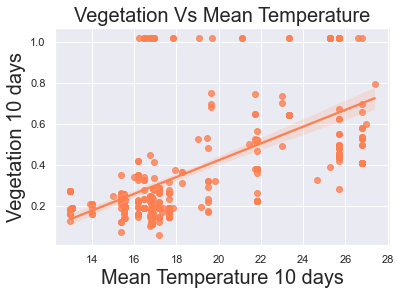

In [87]:
tv = sns.regplot(data=temp_prec_fcover, x="mean_temperature", y="fcover_val", color="coral");
tv.axes.set_title("Vegetation Vs Mean Temperature",fontsize=20)
tv.set_xlabel("Mean Temperature 10 days",fontsize=20)
tv.set_ylabel("Vegetation 10 days",fontsize=20)

Text(0, 0.5, 'Vegetation 10 days')

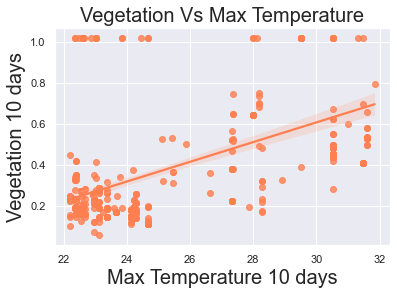

In [88]:
tv = sns.regplot(data=temp_prec_fcover, x="tmax", y="fcover_val", color="coral");
tv.axes.set_title("Vegetation Vs Max Temperature",fontsize=20)
tv.set_xlabel("Max Temperature 10 days",fontsize=20)
tv.set_ylabel("Vegetation 10 days",fontsize=20)

### Could be correct?

Whether in the presence or absence of adequate soil moisture in the soil profile, heat stress can be an important risk and/or limitation to plant growth and development. While some crops are more susceptible to heat stress during critical growth stages <b>[e.g., pollination for corn and R3 (flowering) stage for soybean]</b>, both corn and soybean are also susceptible to extreme heat (and water) stress during early vegetative stages.

Extreme heat stress can reduce plant photosynthetic and transpiration efficiencies and negatively impact plant root development, which collectively can negatively impact yield. The decline in the photosynthetic rate under both heat and water stresses are frequently attributed to:

    - lowered internal plant CO2,
    - inhibition of photosynthetic enzymes
    - synthesis of ATP (adenosine triphosphate), which produces chemical energy that is needed for regulating plant biochemical reactions.

In [89]:
df_values=temp_prec_fcover_soil[['tmin','tmax','tmean','sm','vegetation','precip','perc_numeric']]
df_values.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

In [90]:
corr_mat = df_values.corr().stack().reset_index(name="correlation")

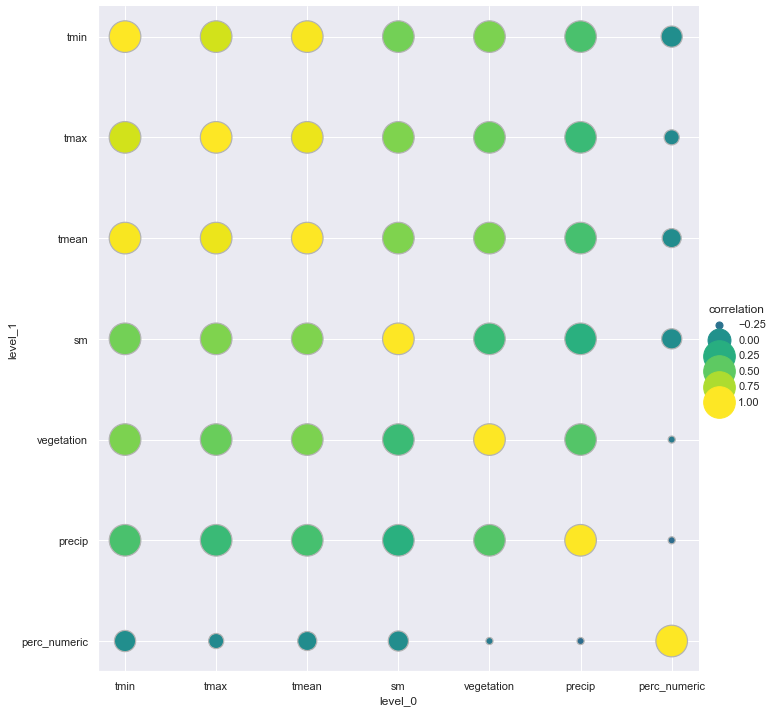

In [91]:
sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", 
    hue="correlation", 
    size="correlation",
    palette="viridis", 
    hue_norm=(-1, 1), 
    edgecolor=".7",
    height=10, 
    sizes=(50, 1000), 
    size_norm=(-.1, .1),
);

In [92]:
hvplot.scatter_matrix(df_values)

:GridMatrix   [X,Y]
   :Histogram   [vegetation]   (vegetation_count)

Text(0, 0.5, 'Level of Infestation')

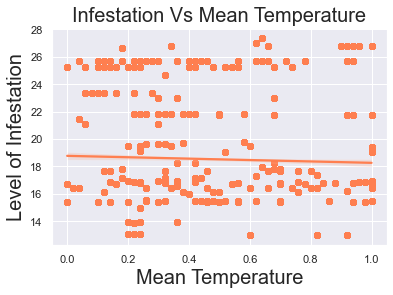

In [93]:
tv = sns.regplot(data=temp_prec_fcover_soil, x="perc_numeric", y="tmean", color="coral");
tv.axes.set_title("Infestation Vs Mean Temperature",fontsize=20)
tv.set_xlabel("Mean Temperature",fontsize=20)
tv.set_ylabel("Level of Infestation",fontsize=20)

Text(0, 0.5, 'Level of Infestation')

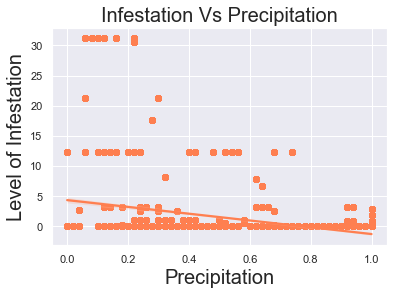

In [94]:
tv = sns.regplot(data=temp_prec_fcover_soil, x="perc_numeric", y="precip", color="coral");
tv.axes.set_title("Infestation Vs Precipitation",fontsize=20)
tv.set_xlabel("Precipitation",fontsize=20)
tv.set_ylabel("Level of Infestation",fontsize=20)

Text(0, 0.5, 'Level of Infestation')

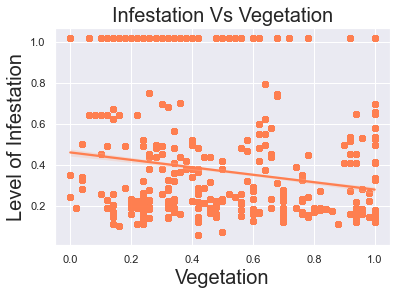

In [95]:
tv = sns.regplot(data=temp_prec_fcover_soil, x="perc_numeric", y="vegetation", color="coral");
tv.axes.set_title("Infestation Vs Vegetation",fontsize=20)
tv.set_xlabel("Vegetation",fontsize=20)
tv.set_ylabel("Level of Infestation",fontsize=20)

Text(0, 0.5, 'Level of Infestation')

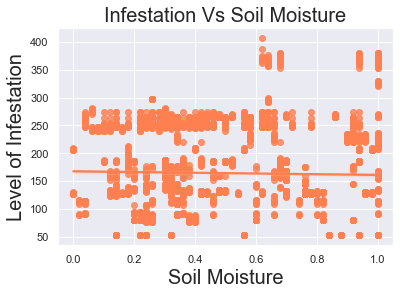

In [96]:
tv = sns.regplot(data=temp_prec_fcover_soil, x="perc_numeric", y="sm", color="coral");
tv.axes.set_title("Infestation Vs Soil Moisture",fontsize=20)
tv.set_xlabel("Soil Moisture",fontsize=20)
tv.set_ylabel("Level of Infestation",fontsize=20)

In [97]:
temp_prec_fcover_soil.to_sql('enriched_data',con=conn)

810